In [27]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [28]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.2

with open('xsec.json') as f:
  xs = json.load(f)

with open('pmap.json') as f:
  pmap = json.load(f)

In [29]:
year = '2018'
nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
outsum = {} #processor.dict_accumulator()

In [30]:
repickle=True

In [31]:
# Load all files - this takes a while
if repickle:
    
    nfiles = len(subprocess.getoutput("ls infiles-split/"+year+"*.json").split())
    for n in range(1,nfiles+1):

        with open('infiles-split/'+year+'_'+str(n)+'.json') as f:
            infiles = json.load(f)
    
        filename = '/myeosdir/ggf-vbf-plots/outfiles-ddb2/'+year+'_'+str(n)+'.coffea'
        if os.path.isfile(filename):
            out = util.load(filename)
            
            if n == 1:
                outsum['muonkin'] = out['muonkin']
                outsum['fatjetkin'] = out['fatjetkin']
                outsum['smalljetkin'] = out['smalljetkin']
                outsum['smalljetflav'] = out['smalljetflav']
                outsum['sumw'] = out['sumw']
            else:
                outsum['muonkin'].add(out['muonkin'])
                outsum['fatjetkin'].add(out['fatjetkin'])
                outsum['smalljetkin'].add(out['smalljetkin'])
                outsum['smalljetflav'].add(out['smalljetflav'])
                outsum['sumw'].add(out['sumw'])

        else:
            print('Missing file '+str(n),infiles.keys())
            #print("File " + filename + " is missing")
            
    scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
    outsum['muonkin'].scale(scale_lumi, 'dataset')
    outsum['fatjetkin'].scale(scale_lumi, 'dataset')
    outsum['smalljetkin'].scale(scale_lumi, 'dataset')
    outsum['smalljetflav'].scale(scale_lumi, 'dataset')
     
    muonkin = outsum['muonkin'].group('dataset', hist.Cat('process', 'Process'), pmap)
    outfile = open('pickles/'+year+'_muonkin.pkl', 'wb')
    pickle.dump(muonkin, outfile, protocol=-1)
    outfile.close()
    
    fatjetkin = outsum['fatjetkin'].group('dataset', hist.Cat('process', 'Process'), pmap)
    outfile = open('pickles/'+year+'_fatjetkin.pkl', 'wb')
    pickle.dump(fatjetkin, outfile, protocol=-1)
    outfile.close()
    
    smalljetkin = outsum['smalljetkin'].group('dataset', hist.Cat('process', 'Process'), pmap) 
    outfile = open('pickles/'+year+'_smalljetkin.pkl', 'wb')
    pickle.dump(smalljetkin, outfile, protocol=-1)
    outfile.close()
    
    smalljetflav = outsum['smalljetflav'].group('dataset', hist.Cat('process', 'Process'), pmap)
    outfile = open('pickles/'+year+'_smalljetflav.pkl', 'wb')
    pickle.dump(smalljetflav, outfile, protocol=-1)
    outfile.close()

Missing file 2072 dict_keys(['TTToHadronic_TuneCP5_13TeV-powheg-pythia8'])
Missing file 2771 dict_keys(['WJetsToLNu_HT-800To1200_TuneCP5_13TeV-madgraphMLM-pythia8'])


In [32]:
# Read the histogram from the pickle file
fatjetkin_ggf = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region','signal-ggf')
smalljetkin_ggf = pickle.load(open('pickles/'+year+'_smalljetkin.pkl','rb')).integrate('region','signal-ggf')

fatjetkin_vbf = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region','signal-vbf')
smalljetkin_vbf = pickle.load(open('pickles/'+year+'_smalljetkin.pkl','rb')).integrate('region','signal-vbf')

fatjetkin_tot = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region',['signal-ggf','signal-vbf'])
smalljetkin_tot = pickle.load(open('pickles/'+year+'_smalljetkin.pkl','rb')).integrate('region',['signal-ggf','signal-vbf'])

smalljetflav_tot = pickle.load(open('pickles/'+year+'_smalljetflav.pkl','rb')).integrate('region',['signal-vbf','signal-ggf'])
smalljetflav_vbf = pickle.load(open('pickles/'+year+'_smalljetflav.pkl','rb')).integrate('region','signal-vbf')

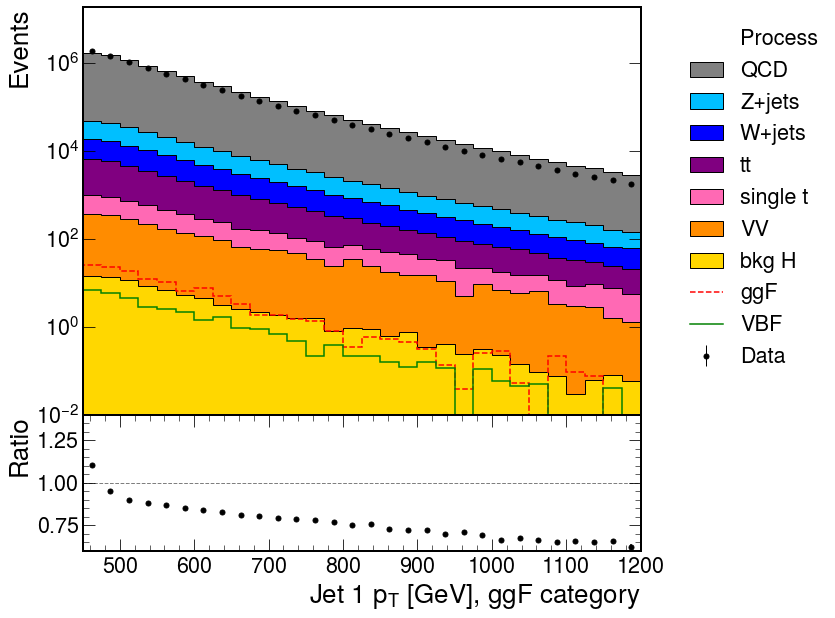

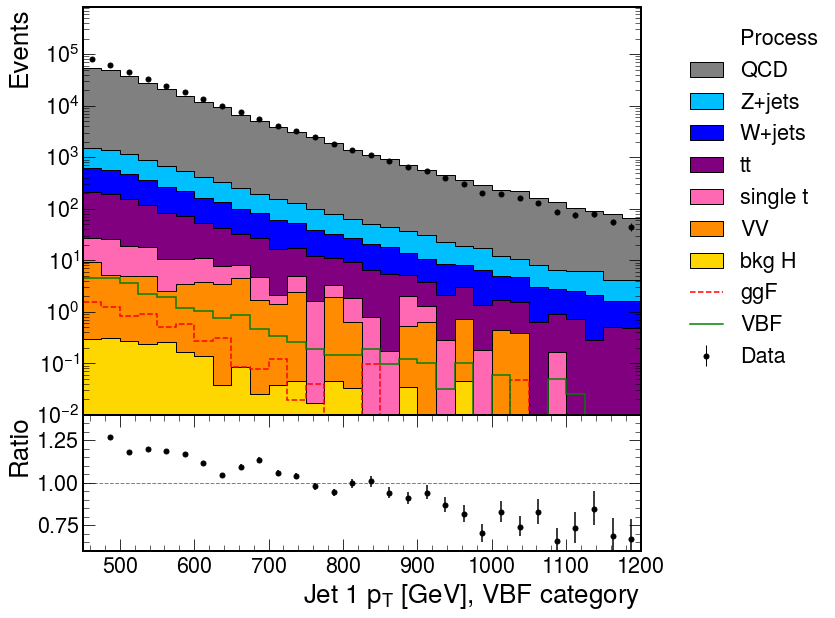

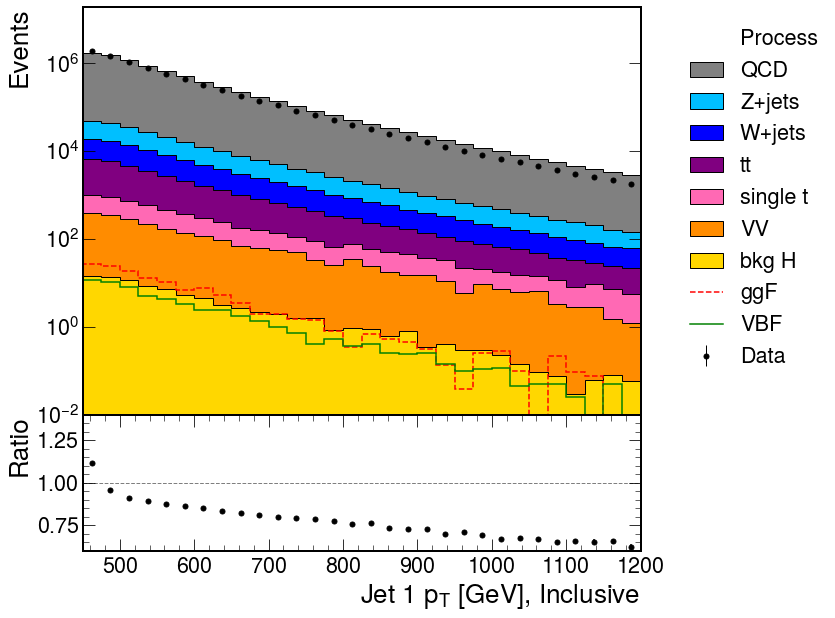

In [33]:
plot_datamc_ggfvbf(fatjetkin_ggf.sum('eta1'), year+'/datamc_ggf_pt1', 'Jet 1 $p_T$ [GeV], ggF category')
plot_datamc_ggfvbf(fatjetkin_vbf.sum('eta1'), year+'/datamc_vbf_pt1', 'Jet 1 $p_T$ [GeV], VBF category')
plot_datamc_ggfvbf(fatjetkin_tot.sum('eta1'), year+'/datamc_tot_pt1', 'Jet 1 $p_T$ [GeV], Inclusive')

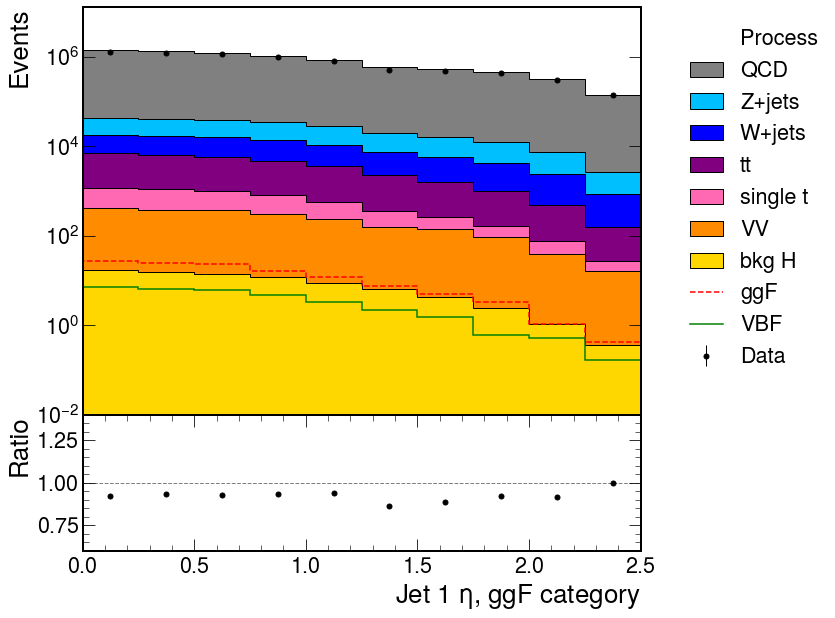

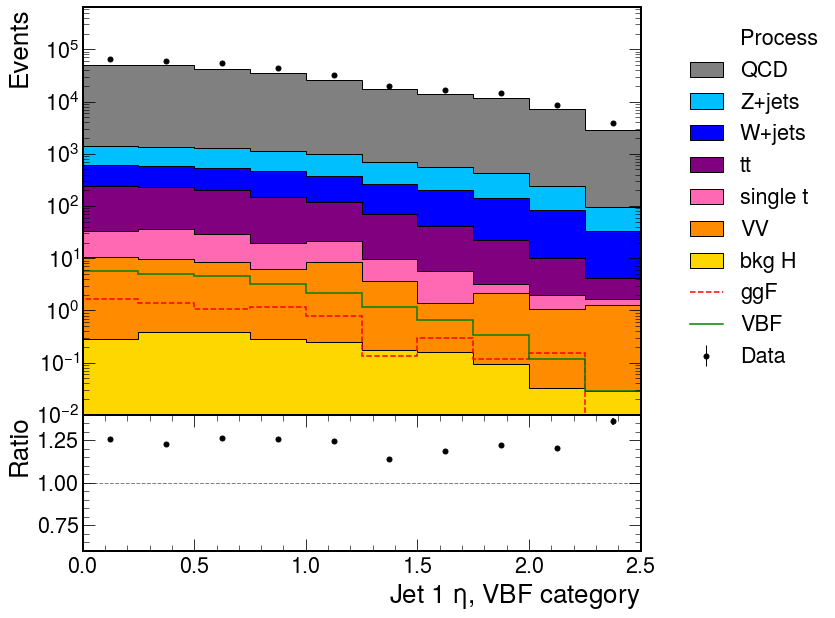

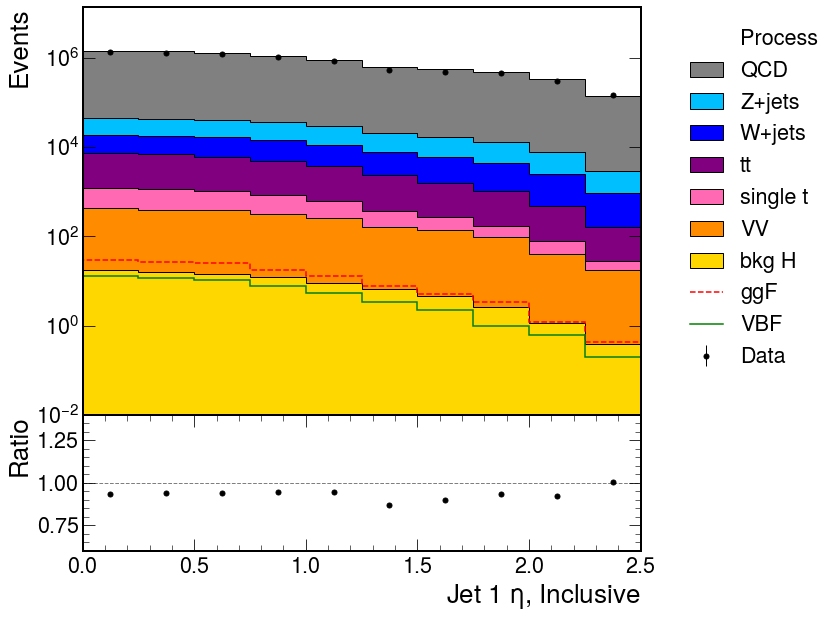

In [34]:
plot_datamc_ggfvbf(fatjetkin_ggf.sum('pt1'), year+'/datamc_ggf_eta1', 'Jet 1 $\eta$, ggF category',xlim=2.5)
plot_datamc_ggfvbf(fatjetkin_vbf.sum('pt1'), year+'/datamc_vbf_eta1', 'Jet 1 $\eta$, VBF category',xlim=2.5)
plot_datamc_ggfvbf(fatjetkin_tot.sum('pt1'), year+'/datamc_tot_eta1', 'Jet 1 $\eta$, Inclusive',xlim=2.5)

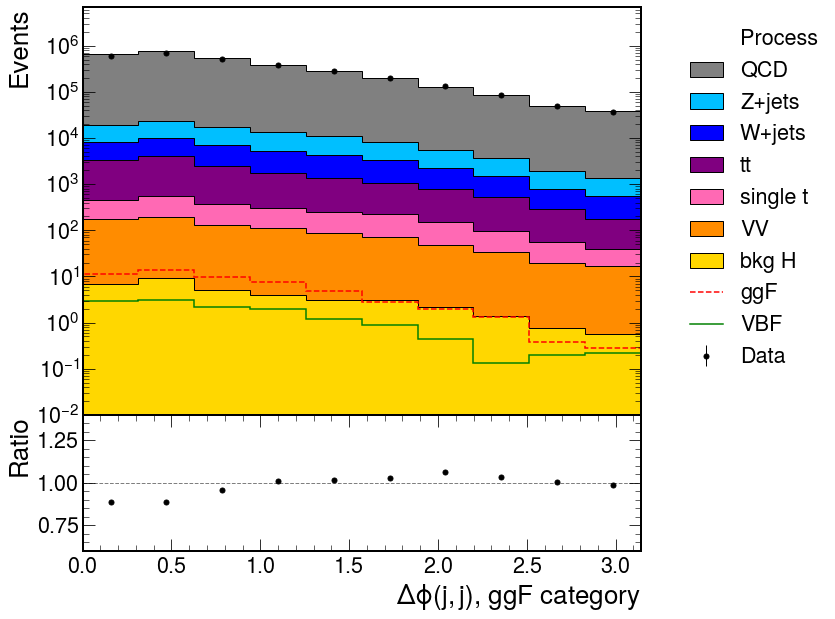

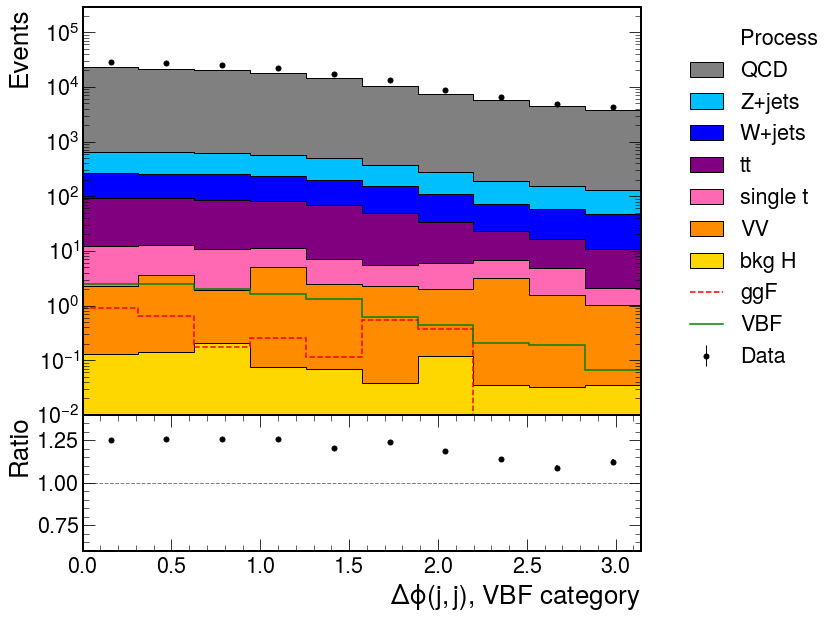

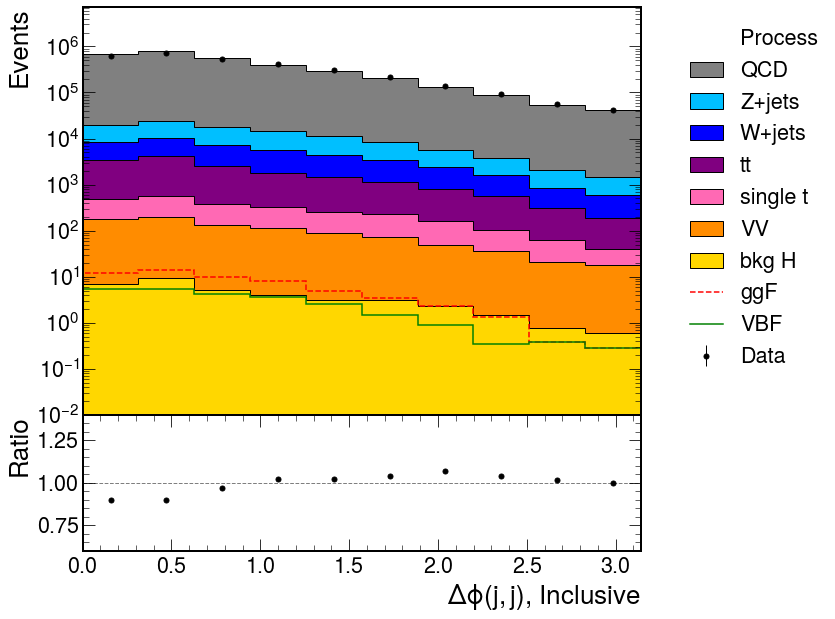

In [35]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('deta','mjj'), year+'/datamc_ggf_dphi', '$\Delta \phi (j,j)$, ggF category',xlim=3.14)
plot_datamc_ggfvbf(smalljetkin_vbf.sum('deta','mjj'), year+'/datamc_vbf_dphi', '$\Delta \phi (j,j)$, VBF category',xlim=3.14)
plot_datamc_ggfvbf(smalljetkin_tot.sum('deta','mjj'), year+'/datamc_tot_dphi', '$\Delta \phi (j,j)$, Inclusive',xlim=3.14)

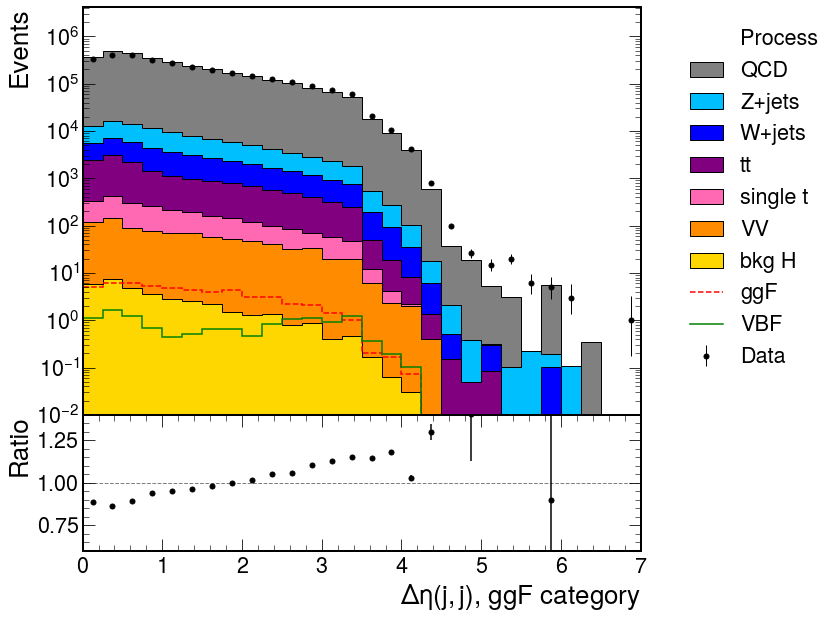

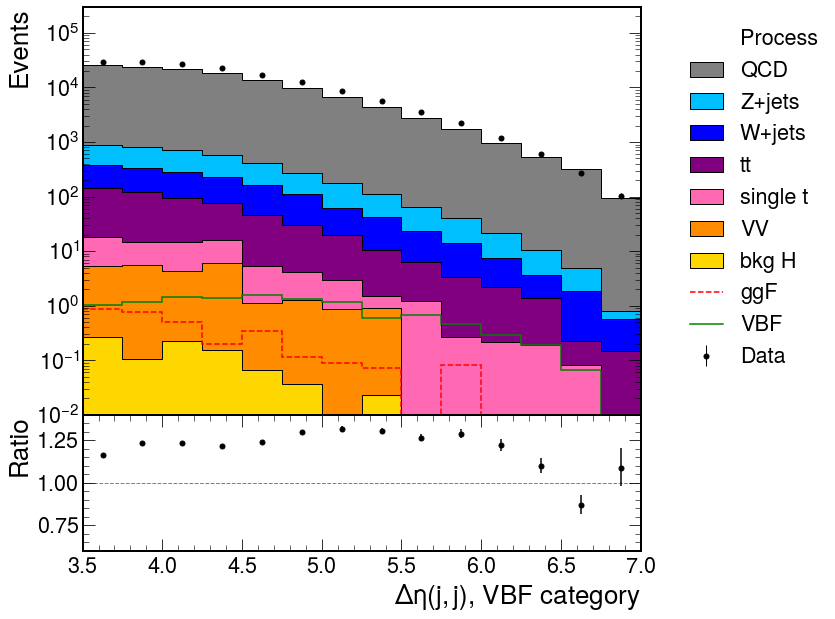

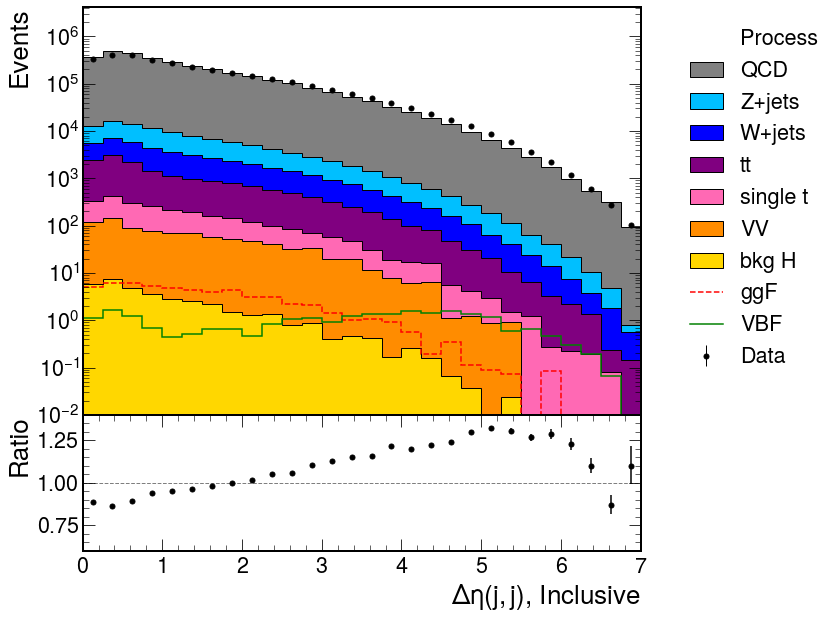

In [36]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('dphi','mjj'), year+'/datamc_ggf_deta', '$\Delta \eta (j,j)$, ggF category',xlim=0)
plot_datamc_ggfvbf(smalljetkin_vbf.sum('dphi','mjj'), year+'/datamc_vbf_deta', '$\Delta \eta (j,j)$, VBF category',xlim=3.5)
plot_datamc_ggfvbf(smalljetkin_tot.sum('dphi','mjj'), year+'/datamc_tot_deta', '$\Delta \eta (j,j)$, Inclusive',xlim=0)

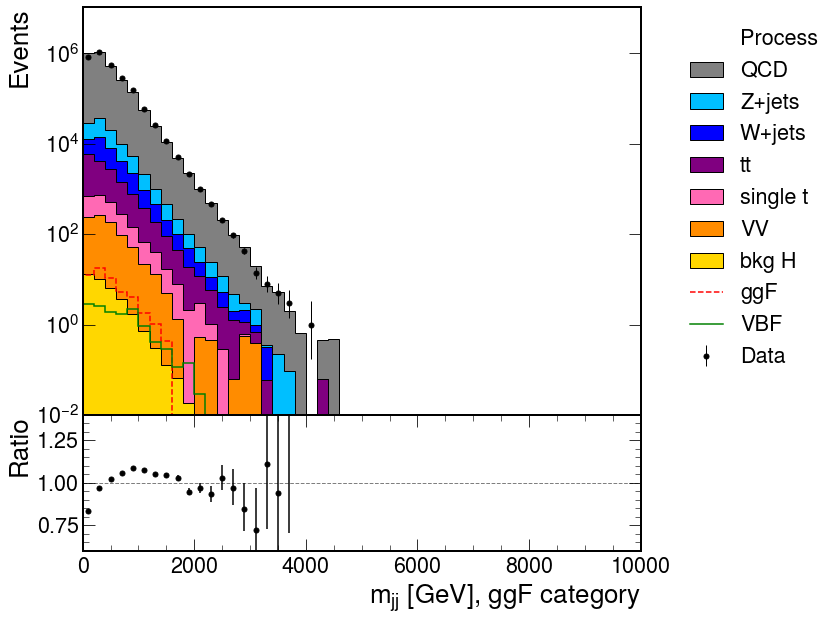

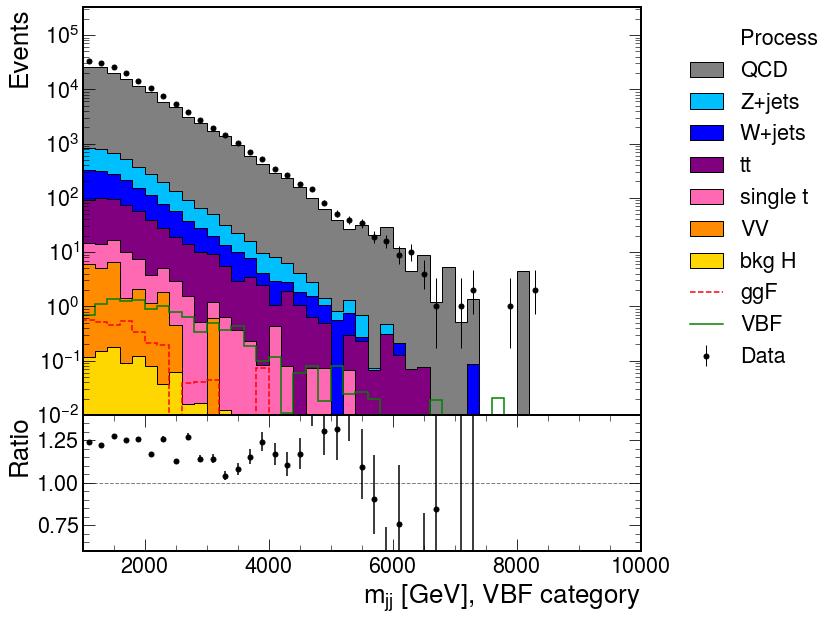

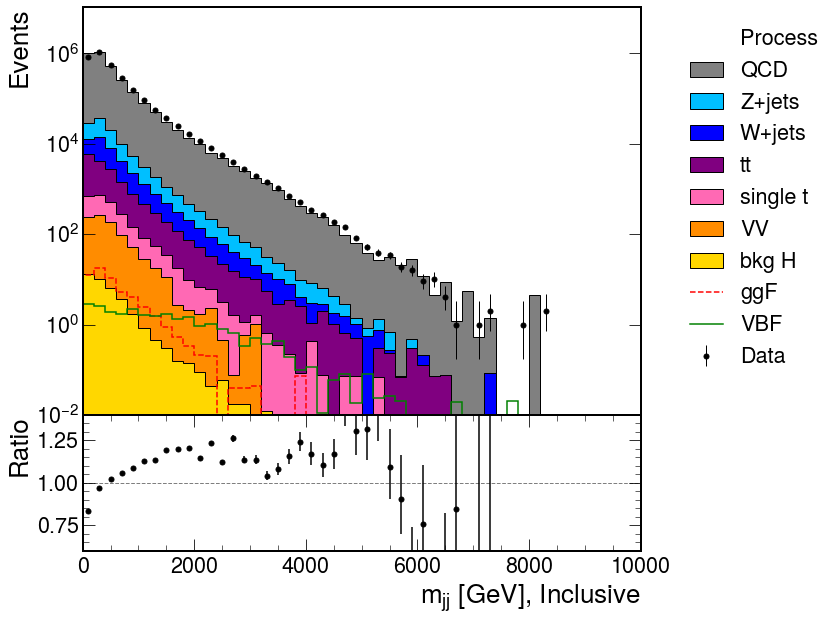

In [37]:
plot_datamc_ggfvbf(smalljetkin_ggf.sum('deta','dphi'), year+'/datamc_ggf_mjj', '$m_{jj}$ [GeV], ggF category')
plot_datamc_ggfvbf(smalljetkin_vbf.sum('deta','dphi'), year+'/datamc_vbf_mjj', '$m_{jj}$ [GeV], VBF category',xlim=1000)
plot_datamc_ggfvbf(smalljetkin_tot.sum('deta','dphi'), year+'/datamc_tot_mjj', '$m_{jj}$ [GeV], Inclusive')

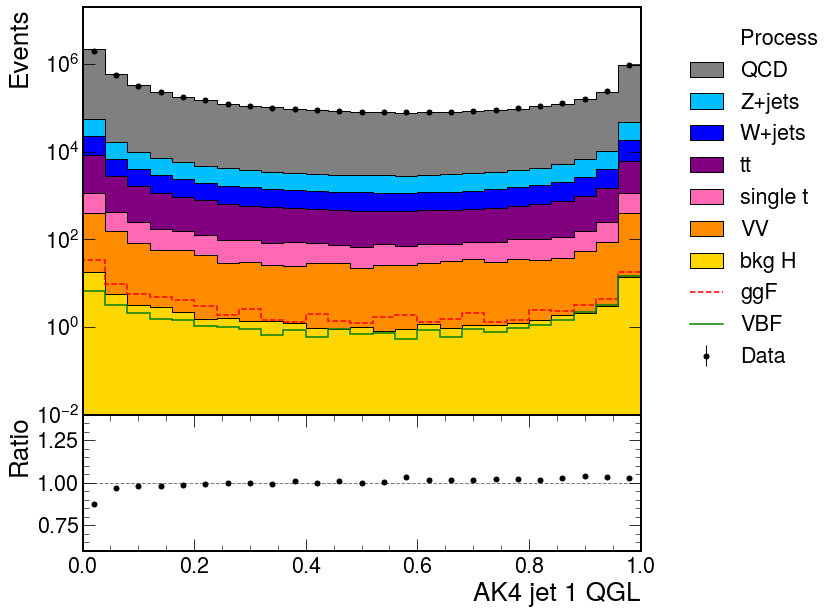

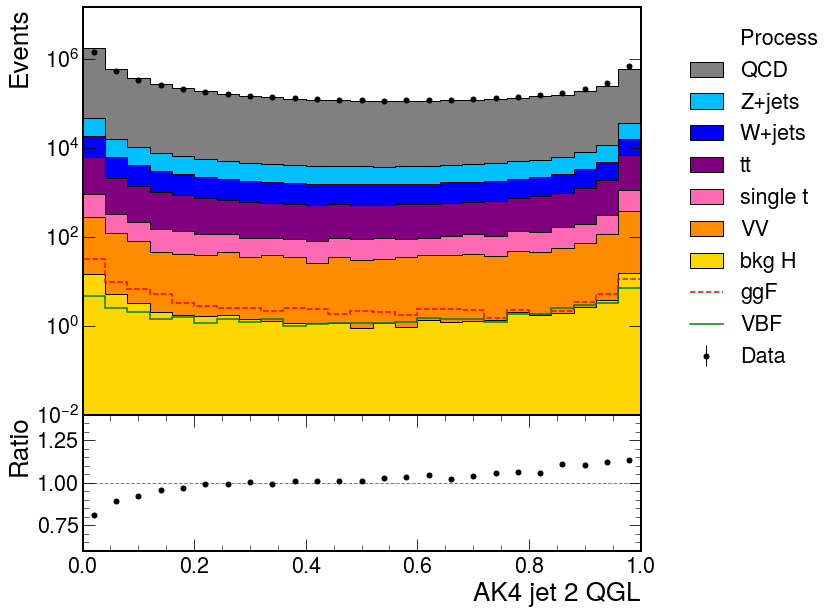

In [38]:
plot_datamc_ggfvbf(smalljetflav_tot.sum('qgl2',), year+'/datamc_tot_qgl1', 'AK4 jet 1 QGL')
plot_datamc_ggfvbf(smalljetflav_tot.sum('qgl1',), year+'/datamc_tot_qgl2', 'AK4 jet 2 QGL')

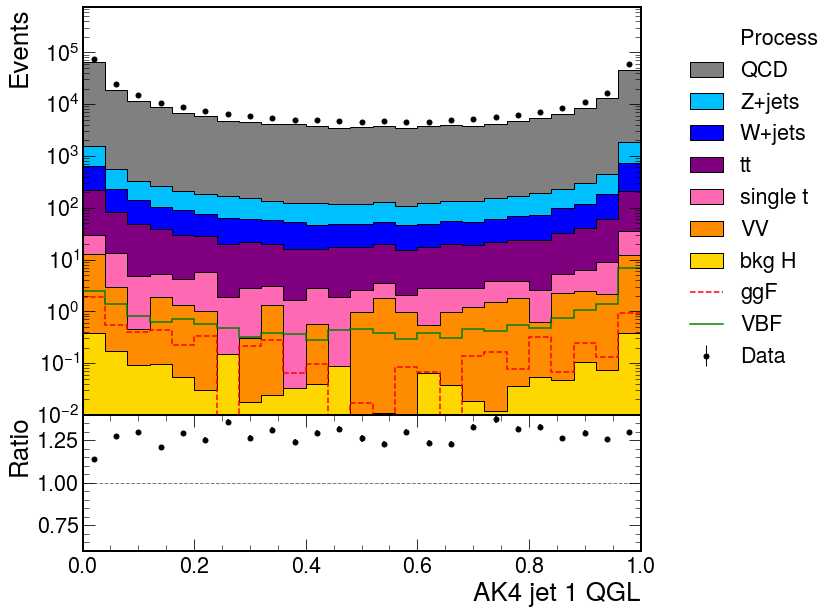

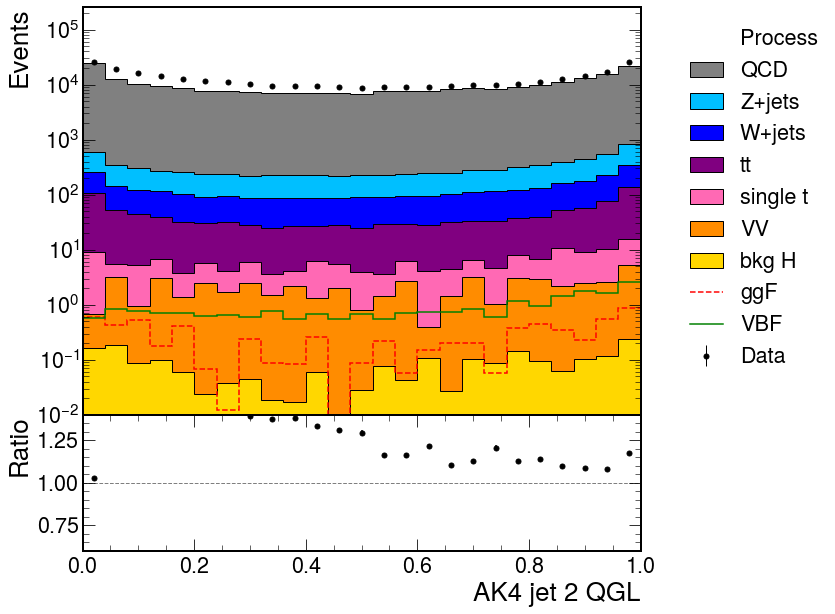

In [39]:
plot_datamc_ggfvbf(smalljetflav_vbf.sum('qgl2',), year+'/datamc_vbf_qgl1', 'AK4 jet 1 QGL')
plot_datamc_ggfvbf(smalljetflav_vbf.sum('qgl1',), year+'/datamc_vbf_qgl2', 'AK4 jet 2 QGL')